# General Package Imports

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import collections
import nltk
import wordcloud
import matplotlib.pyplot as plt # we only need pyplot
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
from statistics import mean
from nltk.probability import FreqDist
import random
import re

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [2]:
#read data from the csv file (Abhigyan's CSV file)
data = pd.read_csv("/Users/abhishekvaidyanathan/Desktop/NLP-project1/reviewSelected100.csv")

In [3]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [4]:
data['business_id'].nunique()

153

# Functions Required for each specification

In [7]:
def remove_stopwords(tokenized_sentence):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in tokenized_sentence if not w.lower() in stop_words]
    filtered_sentence = []
    for w in tokenized_sentence:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [8]:
def tokenisation(sentence):
    word_tokens_with_stop = word_tokenize(sentence)
    word_tokens=remove_stopwords(word_tokens_with_stop)
    return word_tokens

In [9]:
# wordnet lemmatizer
def wordnet_lemmatizer(sentence):
    tokenised_sentence=tokenisation(sentence)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = [lemmatizer.lemmatize(w) for w in tokenised_sentence]
    return(lemmatized_sentence)

In [10]:
# porter stemming
def Porter_stemming(sentence):
    tokenised_sentence=tokenisation(sentence)
    porter = PorterStemmer()
    Porter_stemming_sentence = [porter.stem(w) for w in tokenised_sentence]
    return(Porter_stemming_sentence)

In [11]:
# lancaster stemming
def Lancaster_stemming(sentence):
    tokenised_sentence=tokenisation(sentence)
    lancaster=LancasterStemmer()
    Lancaster_stemming_sentence = [lancaster.stem(w) for w in tokenised_sentence]
    return(Lancaster_stemming_sentence)

In [12]:
# random business id
def random_business_id(df):
    n = random.randint(0,len(df.business_id)) 
    return df.business_id[n]

In [13]:
def business_review_extracter(dataset,business_id_to_check):
    reviews_text=[]
    reviews_sentences=[]
    reviews_tokens=[]
    for i in range(0,len(dataset.business_id)):
        if dataset.business_id[i]==business_id_to_check:
            reviews_text.append(dataset.text[i])
    for i in range(len(reviews_text)):
        reviews_sentences.append(nltk.tokenize.sent_tokenize(reviews_text[i]))
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            reviews_tokens.append(tokenisation(reviews_sentences[i][j]))
    return reviews_text,reviews_sentences,reviews_tokens
#display word frequency distribution here

In [14]:
def business_lancaster(reviews_sentences):
    lancaster_stemmed=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            lancaster_stemmed.append(Lancaster_stemming(reviews_sentences[i][j]))
    return lancaster_stemmed

In [15]:
def business_poter(reviews_sentences):
    Porter_stemmed=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            Porter_stemmed.append(Porter_stemming(reviews_sentences[i][j]))
    return Porter_stemmed

In [16]:
def business_wordnet(reviews_sentences):
    wordnet_lemmatized=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            wordnet_lemmatized.append(wordnet_lemmatizer(reviews_sentences[i][j]))
    return wordnet_lemmatized

In [275]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
nltk.download('universal_tagset')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/abhishekvaidyanathan/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [17]:
def nltk_pos_tagging(sentence):
    tokenised_sentence=tokenisation(sentence)
    Pos_Tag_Sentence=nltk.pos_tag(tokenised_sentence)
    return Pos_Tag_Sentence

In [18]:
def sentence_tokenizer(sentence):
    tokenised_sentence = []
    tokenised_sentence = sent_tokenize(sentence)
    return tokenised_sentence

In [19]:
def tokenize_sentences(sentence_array):
    sentence_tokens = []
    for sentences in sentence_array:
        tokenize_sent = nltk_pos_tagging(sentences)
        sentence_tokens.append(tokenize_sent)
    return sentence_tokens

In [20]:
def get_text_sentiment(lyrics):
  analysis = TextBlob(lyrics)
  return analysis.sentiment.polarity

In [21]:
def get_sentence_sentiment(sentence_array):
    sentences_sentiment = []
    for sentences in sentence_array:
        sentiment = get_text_sentiment(sentences)
        sentences_sentiment.append(sentiment)
    return sentences_sentiment

In [22]:
def count_noun_adjective_pairs(sentence_array,sentiment_array):
    count_array = []
    i = 0
    for pos_tags_array in sentence_array:
        pos_tags_count_array = []
        for pos_tags in range(len(pos_tags_array)):
            if (((pos_tags_array[pos_tags][1]) == "NN") or ((pos_tags_array[pos_tags][1]) == "NNS") or ((pos_tags_array[pos_tags][1]) == "NNP") or ((pos_tags_array[pos_tags][1]) == "NNPS")):
                i = pos_tags+1
                j = pos_tags-1
                while i <len(pos_tags) and j>=0:
                    if(pos_tags[j]=="JJ"):
                        adjective = wordnet_lemmatizer(pos_tags_array[j][0])[0].lower()
                        noun = wordnet_lemmatizer(pos_tags_array[pos_tags][0])[0].lower()
                        pos_tags_count_array.append(noun,adjective)
                        break
                    elif(pos_tags[i]=="JJ"):
                        adjective = wordnet_lemmatizer(pos_tags_array[i][0])[0].lower()
                        noun = wordnet_lemmatizer(pos_tags_array[pos_tags][0])[0].lower()
                        pos_tags_count_array.append(noun,adjective)
                        break
                    if(i<len(pos_tags)):
                        i = i+1
                    if(j-1>=0):
                        j = j-1
        count_array.append([pos_tags_count_array,len(pos_tags_count_array),sentiment_array[i]])
        i = i+1

    return count_array

In [23]:
def extract_all_noun_adjective_pairs(noun_adjective_pairs,all_noun_adjective_pairs,all_noun_adjective_sentiments):
    for all_pairs in noun_adjective_pairs:
        if (all_pairs[0]!=[]):
            all_noun_adjective_pairs.extend(all_pairs[0])
            for i in range(all_pairs[1]):
                all_noun_adjective_sentiments.append(all_pairs[2])

In [24]:
def convert_list_to_tuple(all_noun_adjective_pairs):
    for i in range(len(all_noun_adjective_pairs)):
        all_noun_adjective_pairs[i] = tuple(all_noun_adjective_pairs[i])

    return all_noun_adjective_pairs

In [25]:
def get_most_common_word_pair(all_noun_adjective_pairs_tuple,top_k,indexes):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    final_list = counter.most_common(top_k)
    for i in range(len(all_noun_adjective_pairs_tuple)):
        for j in final_list:
            if(all_noun_adjective_pairs_tuple[i]==j[0]):
                indexes.append(i)
    return final_list

In [26]:
def get_count_for_specific_word_pairs(all_noun_adjective_pairs_tuple,key_value):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    return dict1[key_value]

In [27]:
def get_count_and_common_word_pairs(tuple1,tuple2):
    list1_as_set = set(tuple1)
    intersection = list1_as_set.intersection(tuple2)
    intersection_as_list = list(intersection)
    for common_elements in intersection_as_list:
        count1 = get_count_for_specific_word_pairs(tuple1,common_elements)
        count2 = get_count_for_specific_word_pairs(tuple2,common_elements)
        print("The common element is ",common_elements,". The count from from each of the tuples are: ",str([count1,count2]),".")


In [28]:
def get_top_frequent_pairs_words(data_rating,top_k):
    all_noun_adjective_pairs_rating = []
    all_noun_adjective_sentiments = []
    dummy_sentiments = []
    mean_sentiments = []
    indexes = []
    data_rating.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_sentiments),axis=1)
    all_noun_adjective_pairs__rating_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)
    top_frequent_pairs_rating = [get_most_common_word_pair(all_noun_adjective_pairs__rating_tuple,top_k,indexes)]
    # top_frequent_pairs_rating.append(indexes)
    i = 0
    for index in indexes:
        dummy_sentiments.append(all_noun_adjective_sentiments[index])

    for pairs in top_frequent_pairs_rating[0]:
        mean_sentiments.append(mean(dummy_sentiments[i:i+pairs[1]]))
        i = i+pairs[1]
    # top_frequent_pairs_rating.append(all_noun_adjective_sentiments)
    top_frequent_pairs_rating.append(mean_sentiments)

    return (top_frequent_pairs_rating)

In [29]:
def barplot_for_the_frequent_word_pairs(data,top_k):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    frequency = []
    word_pairs = []
    for i in get_top_frequent_pairs_words(data,top_k)[0]:
        frequency.append(int(i[1]))
        word_pairs.append(str(i[0]))
    ax.bar(tuple(word_pairs),tuple(frequency))
    ax.set_ylabel('frequency')
    ax.set_xlabel('Word Pairs')
    ax.set_title('frequence of top '+str(top_k)+' word pairs')
    plt.xticks(rotation='vertical')
    plt.show()

In [30]:
def show_wordclouds(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600, collocations=False).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [31]:
def append_tokens(token_list):
    sent_list=[]
    for i in token_list:
        sent=" "
        sent_list.append(sent.join(i))
    return " ".join(sent_list)

# Frequency Distribution Analysis functions

In [469]:
#function to generate wordcloud for a dataframe
def show_wordclouds(text, title="B1"):
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600, collocations=False).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [480]:
def frequencyDistribution(document):
    fdist = FreqDist(word.lower() for word in word_tokenize(document))
    FTable=pd.DataFrame({"word":fdist.keys(), "count":fdist.values()})
    return FTable.sort_values(by=['count'], ascending=False, ignore_index=True)
    

In [470]:
def crudeCountPlot(df):
    df.plot.barh(x='word',y='count')

In [471]:
def frequencyDistributionChart(df):
    # df.plot( kind='hist', title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")
    df.plot(title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [472]:
def frequencyDistributionChart_logXTransformed(df):
    df.plot(logx=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [473]:
def frequencyDistributionChart_logYTransformed(df):
    df.plot(logy=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [474]:
def frequencyDistributionChart_loglogTransformed(df):
    df.plot(loglog=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

# 3.2 Dataset Analysis

In [290]:
dataset = pd.read_csv("/Users/abhishekvaidyanathan/Desktop/NLP-project1/reviewSelected100.csv")

## 3.2a)

### a) Tokenisation, Stemming and lemmatization

#### B1

In [475]:
B1=random_business_id(dataset)
reviews_B1_text,reviews_B1_sentences,reviews_B1_tokens = business_review_extracter(dataset,B1)
#display word frequency distribution here
Porter_Stemming_B1=business_poter(reviews_B1_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B1_sentences)
Wordnet_lematization_B1=business_wordnet(reviews_B1_sentences)
#display word frequency distribution here
B2=random_business_id(dataset)
while(B1!=B2):
    B2=random_business_id(dataset)
reviews_B2_text,reviews_B2_sentences,reviews_B2_tokens = business_review_extracter(dataset,B2)
#display word frequency distribution here
Porter_Stemming_B1=business_poter(reviews_B2_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B2_sentences)
Wordnet_lematization_B2=business_wordnet(reviews_B2_sentences)

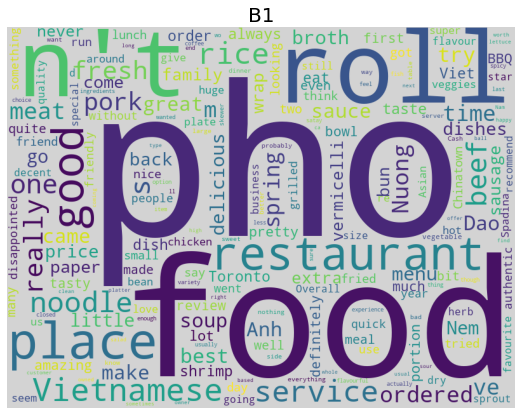

,word,count
0,.,628
1,",",366
2,i,268
3,!,121
4,the,107
5,pho,89
6,food,73
7,n't,69
8,),65
9,(,63


In [483]:
B1=random_business_id(dataset)
reviews_B1_text,reviews_B1_sentences,reviews_B1_tokens = business_review_extracter(dataset,B1)
sentences_appended_b1=append_tokens(reviews_B1_tokens)
show_wordclouds(sentences_appended_b1, "B1")
B1_freq_table=frequencyDistribution(sentences_appended_b1)
B1_freq_table[0:15]

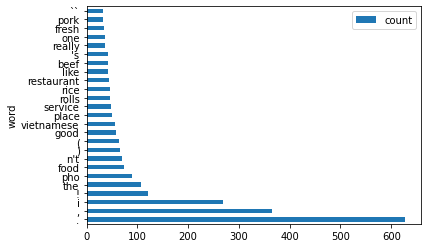

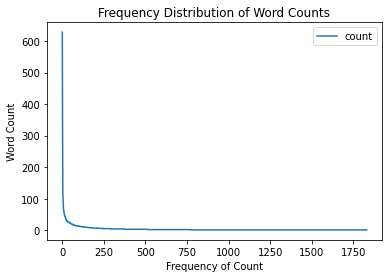

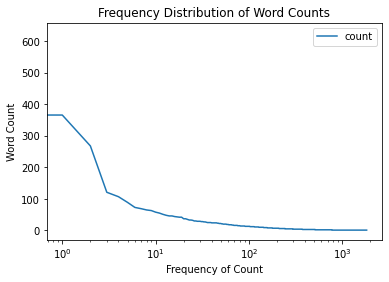

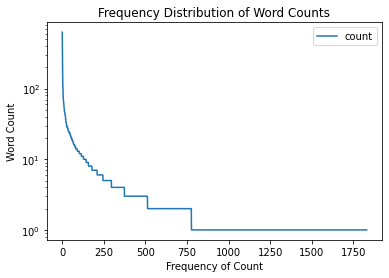

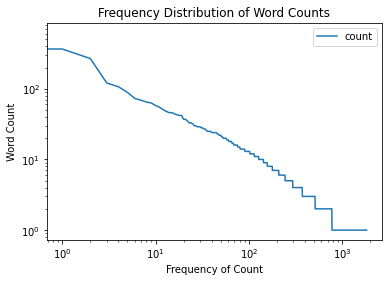

In [484]:
crudeCountPlot(B1_freq_table[0:25])
frequencyDistributionChart(B1_freq_table)
frequencyDistributionChart_logXTransformed(B1_freq_table)
frequencyDistributionChart_logYTransformed(B1_freq_table)
frequencyDistributionChart_loglogTransformed(B1_freq_table)

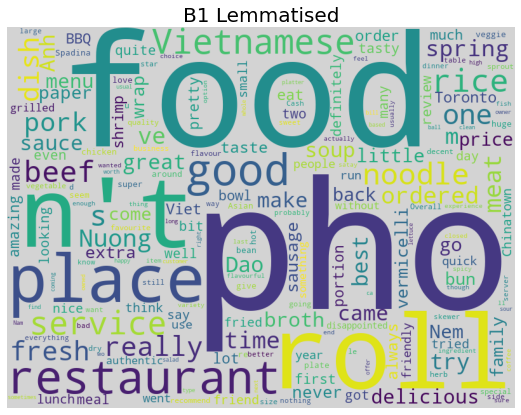

,word,count
0,.,628
1,",",366
2,i,268
3,!,121
4,the,107
5,pho,89
6,food,77
7,roll,74
8,n't,69
9,),65


In [485]:
Porter_Stemming_B1=business_poter(reviews_B1_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B1_sentences)
Wordnet_lematization_B1=business_wordnet(reviews_B1_sentences)
#display word frequency distribution here
## I've just displayed for Wordnet_lemmatization, can just change Params
lemmatised_sentences_appended_b1=append_tokens(Wordnet_lematization_B1)
show_wordclouds(lemmatised_sentences_appended_b1, "B1 Lemmatised")
lemma_B1_freq_table=frequencyDistribution(lemmatised_sentences_appended_b1)
lemma_B1_freq_table[0:15]

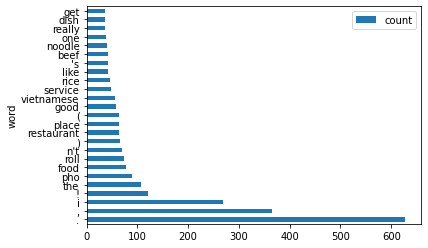

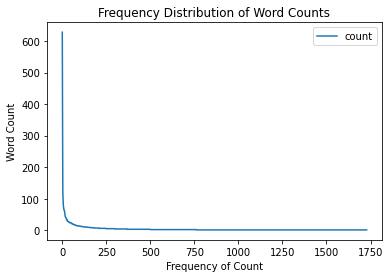

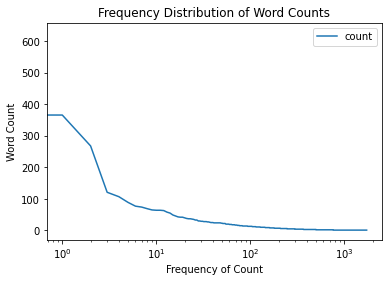

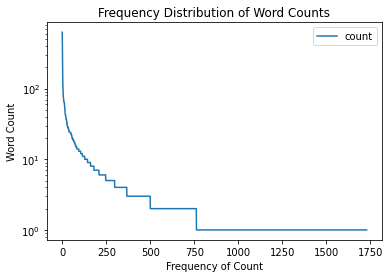

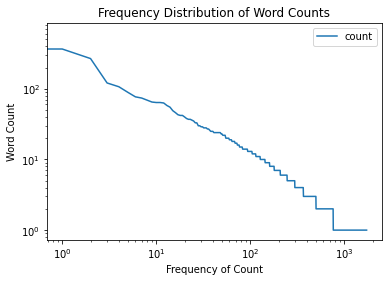

In [486]:
crudeCountPlot(lemma_B1_freq_table[0:25])
frequencyDistributionChart(lemma_B1_freq_table)
frequencyDistributionChart_logXTransformed(lemma_B1_freq_table)
frequencyDistributionChart_logYTransformed(lemma_B1_freq_table)
frequencyDistributionChart_loglogTransformed(lemma_B1_freq_table)

#### B2

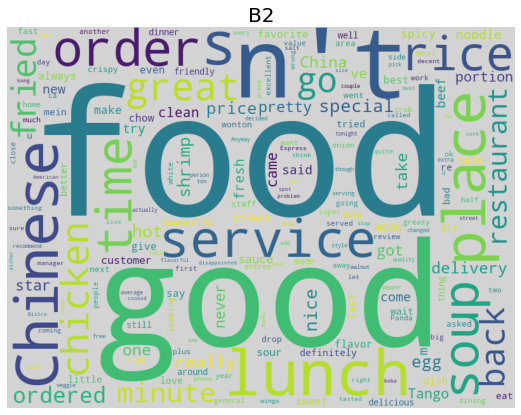

,word,count
0,.,692
1,",",369
2,i,315
3,!,120
4,the,111
5,food,111
6,good,76
7,n't,70
8,lunch,63
9,'s,57


In [488]:
B2=random_business_id(dataset)
while(B1==B2):
    B2=random_business_id(dataset)
reviews_B2_text,reviews_B2_sentences,reviews_B2_tokens = business_review_extracter(dataset,B2)
#display word frequency distribution here
sentences_appended_b2=append_tokens(reviews_B2_tokens)
show_wordclouds(sentences_appended_b2, "B2")
B2_freq_table=frequencyDistribution(sentences_appended_b2)
B2_freq_table[0:15]

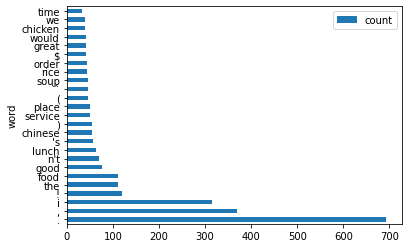

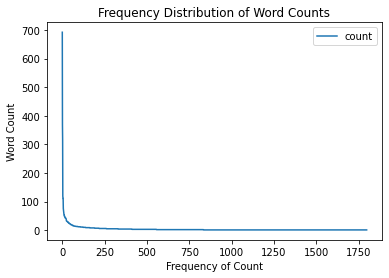

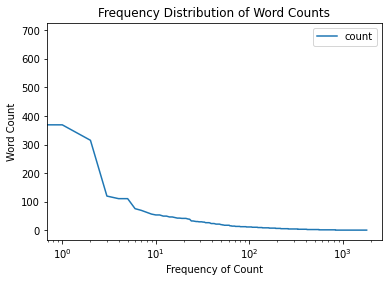

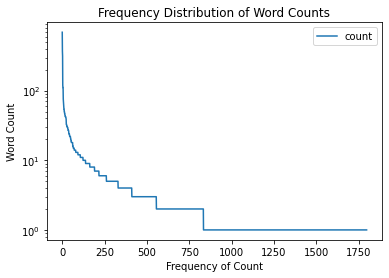

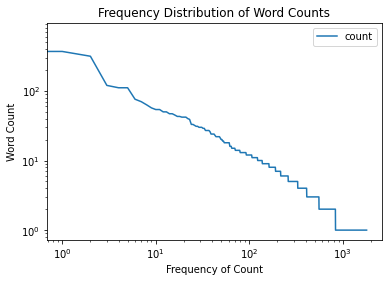

In [489]:
crudeCountPlot(B2_freq_table[0:25])
frequencyDistributionChart(B2_freq_table)
frequencyDistributionChart_logXTransformed(B2_freq_table)
frequencyDistributionChart_logYTransformed(B2_freq_table)
frequencyDistributionChart_loglogTransformed(B2_freq_table)

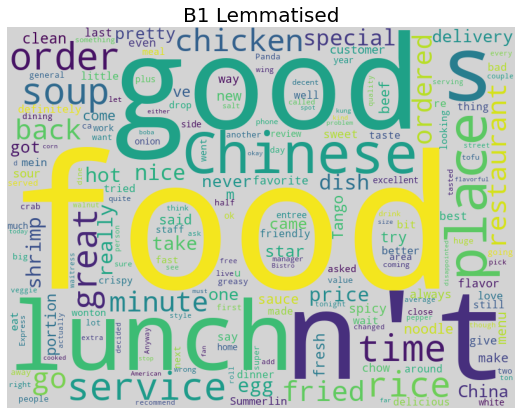

,word,count
0,.,692
1,",",369
2,i,315
3,!,120
4,food,111
5,the,111
6,good,76
7,n't,70
8,lunch,63
9,'s,57


In [490]:
Porter_Stemming_B1=business_poter(reviews_B2_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B2_sentences)
Wordnet_lematization_B2=business_wordnet(reviews_B2_sentences)
#display word frequency distribution here

lemmatised_sentences_appended_b2=append_tokens(Wordnet_lematization_B2)
show_wordclouds(lemmatised_sentences_appended_b2, "B1 Lemmatised")
lemma_B2_freq_table=frequencyDistribution(lemmatised_sentences_appended_b2)
lemma_B2_freq_table[0:15]

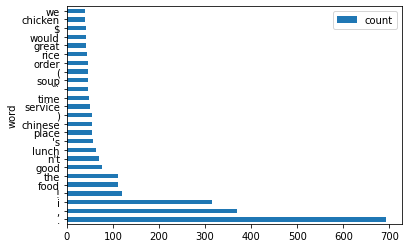

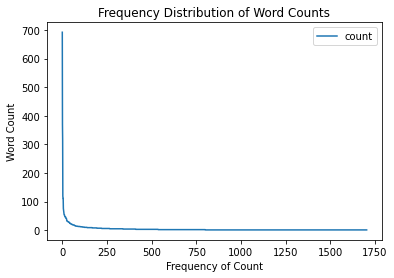

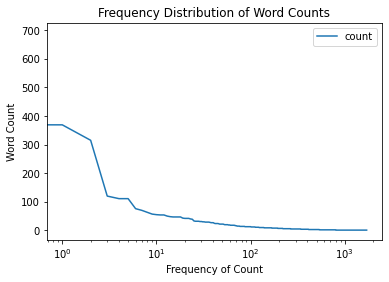

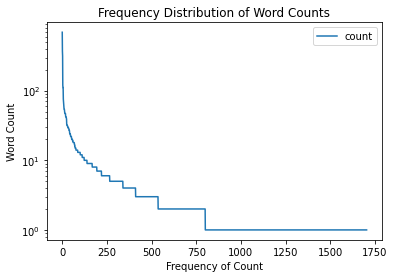

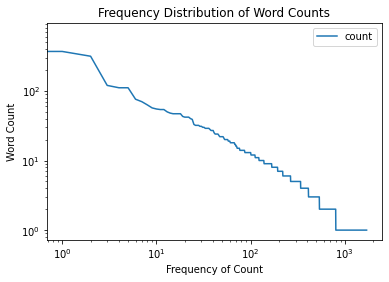

In [491]:
crudeCountPlot(lemma_B2_freq_table[0:25])
frequencyDistributionChart(lemma_B2_freq_table)
frequencyDistributionChart_logXTransformed(lemma_B2_freq_table)
frequencyDistributionChart_logYTransformed(lemma_B2_freq_table)
frequencyDistributionChart_loglogTransformed(lemma_B2_freq_table)

### b) POS Tagging

In [292]:
n=random.sample(range(0, len(dataset.text)), 5)
target=[]
reviews_tokens=[]
reviews_sentences=[]
required_sentences=[]
for i in range(0,5):
    target.append(dataset.text[n[i]])
    reviews_sentences.append(nltk.tokenize.sent_tokenize(target[i]))
for i in range(0,5):
    required_sentences.append(reviews_sentences[i][0])
print(required_sentences)
for i in range(0,len(required_sentences)):
    required_sentences[i]=nltk_pos_tagging(required_sentences[i])
print(required_sentences)

["Worst service I've ever experienced from a company.", 'Well, let tell you this is not a typical Hampton Inn.', 'If you are looking for a dueling piano bar this is NOT the place.', 'I have been here three times in all- the first time was the massage -facial combo others have described and the other two were for massages.', "I was so excited to visit Green Lemon Grass; I've worked in the area for three years but had never ventured into the Richlane Mall to see what it had."]
[[('Worst', 'NNP'), ('service', 'NN'), ('I', 'PRP'), ("'ve", 'VBP'), ('ever', 'RB'), ('experienced', 'VBN'), ('company', 'NN'), ('.', '.')], [('Well', 'RB'), (',', ','), ('let', 'VB'), ('tell', 'VB'), ('typical', 'JJ'), ('Hampton', 'NNP'), ('Inn', 'NNP'), ('.', '.')], [('If', 'IN'), ('looking', 'VBG'), ('dueling', 'VBG'), ('piano', 'NN'), ('bar', 'NN'), ('NOT', 'NNP'), ('place', 'NN'), ('.', '.')], [('I', 'PRP'), ('three', 'CD'), ('times', 'NNS'), ('all-', 'JJ'), ('first', 'JJ'), ('time', 'NN'), ('massage', 'NN'), 

## 3.2b)

### Implementation To Get Noun-Adjective Pairs From 50 Random Reviews Rated 1 

In [362]:
data_rating_1 = data[data['stars']==1]
data_random_new = data_rating_1.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_50_rating_1 = data_random_new.sample(50)
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
36,cJ3lMfZeUwloipVBQGgHsA,NGwmJTVCcLMKg_Ywd8wZuA,JTo0oS3iiMl6UPWA6aI8SQ,1,2,1,1,"I was not going to post this review, but I not...",2018-08-16 23:36:43
1,0n-KuPb4Wyd4AKAChDstEA,6z9FsZ4XWtybQcLuBayanA,-7XWJYkutqhIxLen7Grg1g,1,0,0,0,"Limited selection, poor sashimi and sushi qual...",2016-08-09 00:21:49
124,Bh-VF--17oKP9woci4Aahw,3wgtKrBvmhfeyqA26S7ygw,sj9osyqLyOy7b_kDZb1txA,1,0,0,1,"Horrible!!! Canned mushrooms, stale crust, bla...",2015-11-23 02:23:20
45,-zH5ZCUv5eEE2jePpdst7g,j8FPEI84GQup2VN_0ngrQw,NRAmrbIGgXgH5uYv8GGJ5A,1,0,0,0,Overpriced and average. It's been awhile since...,2018-06-22 14:48:20
20,2PeiE12DkBa7iTE5eJeN4Q,RCKty5gq-iEWL621fXZjqA,AktuBx1W7c3ZdzwuaOp8xg,1,0,1,0,TAKE OUT EXPERIENCE\r\nThis was not only a VER...,2012-03-26 04:55:03


In [363]:
data_random_50_rating_1.shape

(50, 9)

In [364]:
data_random_50_rating_1['pos_tags'] = data_random_50_rating_1.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)

In [365]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
36,cJ3lMfZeUwloipVBQGgHsA,NGwmJTVCcLMKg_Ywd8wZuA,JTo0oS3iiMl6UPWA6aI8SQ,1,2,1,1,"I was not going to post this review, but I not...",2018-08-16 23:36:43,"[(I, PRP), (going, VBG), (post, NN), (review, ..."
1,0n-KuPb4Wyd4AKAChDstEA,6z9FsZ4XWtybQcLuBayanA,-7XWJYkutqhIxLen7Grg1g,1,0,0,0,"Limited selection, poor sashimi and sushi qual...",2016-08-09 00:21:49,"[(Limited, JJ), (selection, NN), (,, ,), (poor..."
124,Bh-VF--17oKP9woci4Aahw,3wgtKrBvmhfeyqA26S7ygw,sj9osyqLyOy7b_kDZb1txA,1,0,0,1,"Horrible!!! Canned mushrooms, stale crust, bla...",2015-11-23 02:23:20,"[(Horrible, JJ), (!, .), (!, .), (!, .), (Cann..."
45,-zH5ZCUv5eEE2jePpdst7g,j8FPEI84GQup2VN_0ngrQw,NRAmrbIGgXgH5uYv8GGJ5A,1,0,0,0,Overpriced and average. It's been awhile since...,2018-06-22 14:48:20,"[(Overpriced, VBN), (average, JJ), (., .), (It..."
20,2PeiE12DkBa7iTE5eJeN4Q,RCKty5gq-iEWL621fXZjqA,AktuBx1W7c3ZdzwuaOp8xg,1,0,1,0,TAKE OUT EXPERIENCE\r\nThis was not only a VER...,2012-03-26 04:55:03,"[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (Th..."


In [366]:
data_random_50_rating_1['text_sentiment'] = data_random_50_rating_1.apply(lambda row: get_text_sentiment(row['text']), axis=1)

In [367]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
36,cJ3lMfZeUwloipVBQGgHsA,NGwmJTVCcLMKg_Ywd8wZuA,JTo0oS3iiMl6UPWA6aI8SQ,1,2,1,1,"I was not going to post this review, but I not...",2018-08-16 23:36:43,"[(I, PRP), (going, VBG), (post, NN), (review, ...",0.122708
1,0n-KuPb4Wyd4AKAChDstEA,6z9FsZ4XWtybQcLuBayanA,-7XWJYkutqhIxLen7Grg1g,1,0,0,0,"Limited selection, poor sashimi and sushi qual...",2016-08-09 00:21:49,"[(Limited, JJ), (selection, NN), (,, ,), (poor...",-0.235714
124,Bh-VF--17oKP9woci4Aahw,3wgtKrBvmhfeyqA26S7ygw,sj9osyqLyOy7b_kDZb1txA,1,0,0,1,"Horrible!!! Canned mushrooms, stale crust, bla...",2015-11-23 02:23:20,"[(Horrible, JJ), (!, .), (!, .), (!, .), (Cann...",-0.211458
45,-zH5ZCUv5eEE2jePpdst7g,j8FPEI84GQup2VN_0ngrQw,NRAmrbIGgXgH5uYv8GGJ5A,1,0,0,0,Overpriced and average. It's been awhile since...,2018-06-22 14:48:20,"[(Overpriced, VBN), (average, JJ), (., .), (It...",0.045455
20,2PeiE12DkBa7iTE5eJeN4Q,RCKty5gq-iEWL621fXZjqA,AktuBx1W7c3ZdzwuaOp8xg,1,0,1,0,TAKE OUT EXPERIENCE\r\nThis was not only a VER...,2012-03-26 04:55:03,"[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (Th...",-0.051206


In [368]:
data_random_50_rating_1['sentence tokenizer'] = data_random_50_rating_1.apply(lambda row: sentence_tokenizer(row['text']),axis=1)

In [369]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
36,cJ3lMfZeUwloipVBQGgHsA,NGwmJTVCcLMKg_Ywd8wZuA,JTo0oS3iiMl6UPWA6aI8SQ,1,2,1,1,"I was not going to post this review, but I not...",2018-08-16 23:36:43,"[(I, PRP), (going, VBG), (post, NN), (review, ...",0.122708,"[I was not going to post this review, but I no..."
1,0n-KuPb4Wyd4AKAChDstEA,6z9FsZ4XWtybQcLuBayanA,-7XWJYkutqhIxLen7Grg1g,1,0,0,0,"Limited selection, poor sashimi and sushi qual...",2016-08-09 00:21:49,"[(Limited, JJ), (selection, NN), (,, ,), (poor...",-0.235714,"[Limited selection, poor sashimi and sushi qua..."
124,Bh-VF--17oKP9woci4Aahw,3wgtKrBvmhfeyqA26S7ygw,sj9osyqLyOy7b_kDZb1txA,1,0,0,1,"Horrible!!! Canned mushrooms, stale crust, bla...",2015-11-23 02:23:20,"[(Horrible, JJ), (!, .), (!, .), (!, .), (Cann...",-0.211458,"[Horrible!!!, Canned mushrooms, stale crust, b..."
45,-zH5ZCUv5eEE2jePpdst7g,j8FPEI84GQup2VN_0ngrQw,NRAmrbIGgXgH5uYv8GGJ5A,1,0,0,0,Overpriced and average. It's been awhile since...,2018-06-22 14:48:20,"[(Overpriced, VBN), (average, JJ), (., .), (It...",0.045455,"[Overpriced and average., It's been awhile sin..."
20,2PeiE12DkBa7iTE5eJeN4Q,RCKty5gq-iEWL621fXZjqA,AktuBx1W7c3ZdzwuaOp8xg,1,0,1,0,TAKE OUT EXPERIENCE\r\nThis was not only a VER...,2012-03-26 04:55:03,"[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (Th...",-0.051206,[TAKE OUT EXPERIENCE\r\nThis was not only a VE...


In [370]:
data_random_50_rating_1["sentence_tokens_pos_tags"] = data_random_50_rating_1.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)

In [371]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
36,cJ3lMfZeUwloipVBQGgHsA,NGwmJTVCcLMKg_Ywd8wZuA,JTo0oS3iiMl6UPWA6aI8SQ,1,2,1,1,"I was not going to post this review, but I not...",2018-08-16 23:36:43,"[(I, PRP), (going, VBG), (post, NN), (review, ...",0.122708,"[I was not going to post this review, but I no...","[[(I, PRP), (going, VBG), (post, NN), (review,..."
1,0n-KuPb4Wyd4AKAChDstEA,6z9FsZ4XWtybQcLuBayanA,-7XWJYkutqhIxLen7Grg1g,1,0,0,0,"Limited selection, poor sashimi and sushi qual...",2016-08-09 00:21:49,"[(Limited, JJ), (selection, NN), (,, ,), (poor...",-0.235714,"[Limited selection, poor sashimi and sushi qua...","[[(Limited, JJ), (selection, NN), (,, ,), (poo..."
124,Bh-VF--17oKP9woci4Aahw,3wgtKrBvmhfeyqA26S7ygw,sj9osyqLyOy7b_kDZb1txA,1,0,0,1,"Horrible!!! Canned mushrooms, stale crust, bla...",2015-11-23 02:23:20,"[(Horrible, JJ), (!, .), (!, .), (!, .), (Cann...",-0.211458,"[Horrible!!!, Canned mushrooms, stale crust, b...","[[(Horrible, JJ), (!, .), (!, .), (!, .)], [(C..."
45,-zH5ZCUv5eEE2jePpdst7g,j8FPEI84GQup2VN_0ngrQw,NRAmrbIGgXgH5uYv8GGJ5A,1,0,0,0,Overpriced and average. It's been awhile since...,2018-06-22 14:48:20,"[(Overpriced, VBN), (average, JJ), (., .), (It...",0.045455,"[Overpriced and average., It's been awhile sin...","[[(Overpriced, VBN), (average, NN), (., .)], [..."
20,2PeiE12DkBa7iTE5eJeN4Q,RCKty5gq-iEWL621fXZjqA,AktuBx1W7c3ZdzwuaOp8xg,1,0,1,0,TAKE OUT EXPERIENCE\r\nThis was not only a VER...,2012-03-26 04:55:03,"[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (Th...",-0.051206,[TAKE OUT EXPERIENCE\r\nThis was not only a VE...,"[[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (T..."


In [372]:
data_random_50_rating_1['sentences_sentiment'] = data_random_50_rating_1.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)

In [373]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
36,cJ3lMfZeUwloipVBQGgHsA,NGwmJTVCcLMKg_Ywd8wZuA,JTo0oS3iiMl6UPWA6aI8SQ,1,2,1,1,"I was not going to post this review, but I not...",2018-08-16 23:36:43,"[(I, PRP), (going, VBG), (post, NN), (review, ...",0.122708,"[I was not going to post this review, but I no...","[[(I, PRP), (going, VBG), (post, NN), (review,...","[-0.17500000000000002, 0.69875, 0.199999999999..."
1,0n-KuPb4Wyd4AKAChDstEA,6z9FsZ4XWtybQcLuBayanA,-7XWJYkutqhIxLen7Grg1g,1,0,0,0,"Limited selection, poor sashimi and sushi qual...",2016-08-09 00:21:49,"[(Limited, JJ), (selection, NN), (,, ,), (poor...",-0.235714,"[Limited selection, poor sashimi and sushi qua...","[[(Limited, JJ), (selection, NN), (,, ,), (poo...",[-0.2357142857142857]
124,Bh-VF--17oKP9woci4Aahw,3wgtKrBvmhfeyqA26S7ygw,sj9osyqLyOy7b_kDZb1txA,1,0,0,1,"Horrible!!! Canned mushrooms, stale crust, bla...",2015-11-23 02:23:20,"[(Horrible, JJ), (!, .), (!, .), (!, .), (Cann...",-0.211458,"[Horrible!!!, Canned mushrooms, stale crust, b...","[[(Horrible, JJ), (!, .), (!, .), (!, .)], [(C...","[-1.0, -0.2638888888888889, -0.2, 0.25]"
45,-zH5ZCUv5eEE2jePpdst7g,j8FPEI84GQup2VN_0ngrQw,NRAmrbIGgXgH5uYv8GGJ5A,1,0,0,0,Overpriced and average. It's been awhile since...,2018-06-22 14:48:20,"[(Overpriced, VBN), (average, JJ), (., .), (It...",0.045455,"[Overpriced and average., It's been awhile sin...","[[(Overpriced, VBN), (average, NN), (., .)], [...","[-0.15, 0.0, 0.06666666666666667, 0.35, -0.5, ..."
20,2PeiE12DkBa7iTE5eJeN4Q,RCKty5gq-iEWL621fXZjqA,AktuBx1W7c3ZdzwuaOp8xg,1,0,1,0,TAKE OUT EXPERIENCE\r\nThis was not only a VER...,2012-03-26 04:55:03,"[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (Th...",-0.051206,[TAKE OUT EXPERIENCE\r\nThis was not only a VE...,"[[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (T...","[-0.5933333333333334, 0.0, -0.1625, 0.21666666..."


In [374]:
data_random_50_rating_1.iloc[0]['sentence_tokens_pos_tags'][1][0][1]

'WRB'

In [375]:
data_random_50_rating_1["noun_adjective_pairs"] = data_random_50_rating_1.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)

In [376]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
36,cJ3lMfZeUwloipVBQGgHsA,NGwmJTVCcLMKg_Ywd8wZuA,JTo0oS3iiMl6UPWA6aI8SQ,1,2,1,1,"I was not going to post this review, but I not...",2018-08-16 23:36:43,"[(I, PRP), (going, VBG), (post, NN), (review, ...",0.122708,"[I was not going to post this review, but I no...","[[(I, PRP), (going, VBG), (post, NN), (review,...","[-0.17500000000000002, 0.69875, 0.199999999999...","[[[['restaurant', 'fix']], 1, -0.1750000000000..."
1,0n-KuPb4Wyd4AKAChDstEA,6z9FsZ4XWtybQcLuBayanA,-7XWJYkutqhIxLen7Grg1g,1,0,0,0,"Limited selection, poor sashimi and sushi qual...",2016-08-09 00:21:49,"[(Limited, JJ), (selection, NN), (,, ,), (poor...",-0.235714,"[Limited selection, poor sashimi and sushi qua...","[[(Limited, JJ), (selection, NN), (,, ,), (poo...",[-0.2357142857142857],"[[[['selection', 'Limited'], ['sashimi', 'poor..."
124,Bh-VF--17oKP9woci4Aahw,3wgtKrBvmhfeyqA26S7ygw,sj9osyqLyOy7b_kDZb1txA,1,0,0,1,"Horrible!!! Canned mushrooms, stale crust, bla...",2015-11-23 02:23:20,"[(Horrible, JJ), (!, .), (!, .), (!, .), (Cann...",-0.211458,"[Horrible!!!, Canned mushrooms, stale crust, b...","[[(Horrible, JJ), (!, .), (!, .), (!, .)], [(C...","[-1.0, -0.2638888888888889, -0.2, 0.25]","[[[], 0, -1.0], [[['crust', 'stale']], 1, -0.2..."
45,-zH5ZCUv5eEE2jePpdst7g,j8FPEI84GQup2VN_0ngrQw,NRAmrbIGgXgH5uYv8GGJ5A,1,0,0,0,Overpriced and average. It's been awhile since...,2018-06-22 14:48:20,"[(Overpriced, VBN), (average, JJ), (., .), (It...",0.045455,"[Overpriced and average., It's been awhile sin...","[[(Overpriced, VBN), (average, NN), (., .)], [...","[-0.15, 0.0, 0.06666666666666667, 0.35, -0.5, ...","[[[], 0, -0.15], [[], 0, 0.0], [[['priority', ..."
20,2PeiE12DkBa7iTE5eJeN4Q,RCKty5gq-iEWL621fXZjqA,AktuBx1W7c3ZdzwuaOp8xg,1,0,1,0,TAKE OUT EXPERIENCE\r\nThis was not only a VER...,2012-03-26 04:55:03,"[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (Th...",-0.051206,[TAKE OUT EXPERIENCE\r\nThis was not only a VE...,"[[(TAKE, VB), (OUT, RP), (EXPERIENCE, NNP), (T...","[-0.5933333333333334, 0.0, -0.1625, 0.21666666...","[[[['experience', 'awkward']], 1, -0.593333333..."


In [451]:
top_frequent = get_top_frequent_pairs_words(data_random_50_rating_1,3)

In [467]:
top_frequent[0]

[(('food', 'good'), 4), (('rice', 'small'), 2), (('money', 'worth'), 2)]

In [468]:
top_frequent[1]

[-0.0625, 0.2890625, 0.3]

### Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 2

In [380]:
data_rating_2 = data[data['stars']==2]
data_random_rating_2 = data_rating_2.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_2 = data_random_rating_2.sample(20)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21


In [381]:
data_random_20_rating_2.shape

(20, 9)

In [382]:
data_random_20_rating_2['pos_tags'] = data_random_20_rating_2.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ..."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif..."
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri..."


In [383]:
data_random_20_rating_2['text_sentiment'] = data_random_20_rating_2.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762


In [384]:
data_random_20_rating_2['sentence tokenizer'] = data_random_20_rating_2.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546,"[I visited here with my dad for lunch., Frankl..."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333,"[Pho broth was bland., It was just eh., I have..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780,[I was given services here as a gift and was h...
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111,"[1st off, I do like this joint., Sunday brunch..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762,[I was told by a Vietnamese friend that this i...


In [385]:
data_random_20_rating_2["sentence_tokens_pos_tags"] = data_random_20_rating_2.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546,"[I visited here with my dad for lunch., Frankl...","[[(I, PRP), (visited, VBD), (dad, NN), (lunch,..."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333,"[Pho broth was bland., It was just eh., I have...","[[(Pho, NNP), (broth, DT), (bland, NN), (., .)..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780,[I was given services here as a gift and was h...,"[[(I, PRP), (given, VBN), (services, NNS), (gi..."
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111,"[1st off, I do like this joint., Sunday brunch...","[[(1st, CD), (,, ,), (I, PRP), (like, VBP), (j..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762,[I was told by a Vietnamese friend that this i...,"[[(I, PRP), (told, VBD), (Vietnamese, JJ), (fr..."


In [386]:
data_random_20_rating_2['sentences_sentiment'] = data_random_20_rating_2.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546,"[I visited here with my dad for lunch., Frankl...","[[(I, PRP), (visited, VBD), (dad, NN), (lunch,...","[0.0, -1.0, 0.16666666666666666, 0.0, 0.0, -1...."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333,"[Pho broth was bland., It was just eh., I have...","[[(Pho, NNP), (broth, DT), (bland, NN), (., .)...","[-0.16666666666666666, 0.0, 0.5, 0.64999999999..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780,[I was given services here as a gift and was h...,"[[(I, PRP), (given, VBN), (services, NNS), (gi...","[0.35714285714285715, 0.8, 0.25, 0.0, 0.554999..."
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111,"[1st off, I do like this joint., Sunday brunch...","[[(1st, CD), (,, ,), (I, PRP), (like, VBP), (j...","[0.0, 0.0, 0.16666666666666666, 0.0, 0.4499999..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762,[I was told by a Vietnamese friend that this i...,"[[(I, PRP), (told, VBD), (Vietnamese, JJ), (fr...","[0.0, 0.0, 0.25, -0.32499999999999996, 0.26428..."


In [387]:
data_random_20_rating_2["noun_adjective_pairs"] = data_random_20_rating_2.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546,"[I visited here with my dad for lunch., Frankl...","[[(I, PRP), (visited, VBD), (dad, NN), (lunch,...","[0.0, -1.0, 0.16666666666666666, 0.0, 0.0, -1....","[[[], 0, 0.0], [[], 0, -1.0], [[['love', 'ta']..."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333,"[Pho broth was bland., It was just eh., I have...","[[(Pho, NNP), (broth, DT), (bland, NN), (., .)...","[-0.16666666666666666, 0.0, 0.5, 0.64999999999...","[[[], 0, -0.16666666666666666], [[], 0, 0.0], ..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780,[I was given services here as a gift and was h...,"[[(I, PRP), (given, VBN), (services, NNS), (gi...","[0.35714285714285715, 0.8, 0.25, 0.0, 0.554999...","[[[['experience', 'special']], 1, 0.3571428571..."
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111,"[1st off, I do like this joint., Sunday brunch...","[[(1st, CD), (,, ,), (I, PRP), (like, VBP), (j...","[0.0, 0.0, 0.16666666666666666, 0.0, 0.4499999...","[[[], 0, 0.0], [[['area', 'brunch']], 1, 0.0],..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762,[I was told by a Vietnamese friend that this i...,"[[(I, PRP), (told, VBD), (Vietnamese, JJ), (fr...","[0.0, 0.0, 0.25, -0.32499999999999996, 0.26428...","[[[['friend', 'Vietnamese']], 1, 0.0], [[], 0,..."


In [454]:
top_frequent_rating_2 = get_top_frequent_pairs_words(data_random_20_rating_2,3)

In [455]:
top_frequent_rating_2[0]

[(('stone', 'hot'), 3), (('massage', 'hot'), 2), (('manicure', 'citrus'), 2)]

In [456]:
top_frequent_rating_2[1]

[0.15555555555555556, 0.09375, 0.18263888888888888]

### Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 3 

In [391]:
data_rating_3 = data[data['stars']==3]
data_random_rating_3 = data_rating_3.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_3 = data_random_rating_3.sample(20)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23


In [392]:
data_random_20_rating_3.shape

(20, 9)

In [393]:
data_random_20_rating_3['pos_tags'] = data_random_20_rating_3.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)..."
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N..."


In [394]:
data_random_20_rating_3['text_sentiment'] = data_random_20_rating_3.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548


In [395]:
data_random_20_rating_3['sentence tokenizer'] = data_random_20_rating_3.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028,"[Lunch: Beef & lamb shawarma., Comes with pit..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857,[I came here over 10 times and it's a convenie...
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798,"[I told my daughter, let's just grab some pede..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917,"[I really want to like this place!!, I really ..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548,"[Not a bad place for Korean food., Although th..."


In [396]:
data_random_20_rating_3["sentence_tokens_pos_tags"] = data_random_20_rating_3.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028,"[Lunch: Beef & lamb shawarma., Comes with pit...","[[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857,[I came here over 10 times and it's a convenie...,"[[(I, PRP), (came, VBD), (10, CD), (times, NNS..."
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798,"[I told my daughter, let's just grab some pede...","[[(I, PRP), (told, VBD), (daughter, NN), (,, ,..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917,"[I really want to like this place!!, I really ...","[[(I, PRP), (really, RB), (want, VBP), (like, ..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548,"[Not a bad place for Korean food., Although th...","[[(Not, RB), (bad, JJ), (place, NN), (Korean, ..."


In [397]:
data_random_20_rating_3['sentences_sentiment'] = data_random_20_rating_3.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028,"[Lunch: Beef & lamb shawarma., Comes with pit...","[[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (...","[0.0, 0.0, 0.0, -0.06944444444444445, 0.0, 0.0..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857,[I came here over 10 times and it's a convenie...,"[[(I, PRP), (came, VBD), (10, CD), (times, NNS...","[-0.4, 0.15357142857142858, 0.7]"
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798,"[I told my daughter, let's just grab some pede...","[[(I, PRP), (told, VBD), (daughter, NN), (,, ,...","[-0.16666666666666666, 0.25, 0.1, 0.1888888888..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917,"[I really want to like this place!!, I really ...","[[(I, PRP), (really, RB), (want, VBP), (like, ...","[0.3125, 0.25, 0.0, 0.5555555555555556, 0.3, 0..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548,"[Not a bad place for Korean food., Although th...","[[(Not, RB), (bad, JJ), (place, NN), (Korean, ...","[0.3499999999999999, 0.0, 0.07142857142857142,..."


In [398]:
data_random_20_rating_3["noun_adjective_pairs"] = data_random_20_rating_3.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028,"[Lunch: Beef & lamb shawarma., Comes with pit...","[[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (...","[0.0, 0.0, 0.0, -0.06944444444444445, 0.0, 0.0...","[[[], 0, 0.0], [[], 0, 0.0], [[['wedge', 'lemo..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857,[I came here over 10 times and it's a convenie...,"[[(I, PRP), (came, VBD), (10, CD), (times, NNS...","[-0.4, 0.15357142857142858, 0.7]","[[[['place', 'convenient'], ['hang', 'convenie..."
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798,"[I told my daughter, let's just grab some pede...","[[(I, PRP), (told, VBD), (daughter, NN), (,, ,...","[-0.16666666666666666, 0.25, 0.1, 0.1888888888...","[[[['food', 'generic'], ['food', 'Chinese']], ..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917,"[I really want to like this place!!, I really ...","[[(I, PRP), (really, RB), (want, VBP), (like, ...","[0.3125, 0.25, 0.0, 0.5555555555555556, 0.3, 0...","[[[['place', 'like']], 1, 0.3125], [[], 0, 0.2..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548,"[Not a bad place for Korean food., Although th...","[[(Not, RB), (bad, JJ), (place, NN), (Korean, ...","[0.3499999999999999, 0.0, 0.07142857142857142,...","[[[['place', 'bad']], 1, 0.3499999999999999], ..."


In [457]:
top_frequent_rating_3 = get_top_frequent_pairs_words(data_random_20_rating_3,3)

In [458]:
top_frequent_rating_3[0]

[(('food', 'Chinese'), 2), (('manicure', 'gel'), 2), (('pot', 'hot'), 2)]

In [459]:
top_frequent_rating_3[1]

[-0.08333333333333333, -0.25, -0.05625]

### Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 4 

In [402]:
data_rating_4 = data[data['stars']==4]
data_random_rating_4 = data_rating_4.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_4 = data_random_rating_4.sample(20)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35


In [403]:
data_random_20_rating_4.shape

(20, 9)

In [404]:
data_random_20_rating_4['pos_tags'] = data_random_20_rating_4.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N..."
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ..."
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN..."
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P..."


In [405]:
data_random_20_rating_4['text_sentiment'] = data_random_20_rating_4.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167


In [406]:
data_random_20_rating_4['sentence tokenizer'] = data_random_20_rating_4.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119,[This is a bit like Johnny Rockets ( with 50's...
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833,"[Clean, simple, no nonsense, no upselling., Ow..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000,"[Love love love this place!, Santa fe spring r..."
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660,[Finally a chinese restaurant in Madison that ...
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167,"[Came in about 1:30 PM., Place was pretty busy..."


In [407]:
data_random_20_rating_4["sentence_tokens_pos_tags"] = data_random_20_rating_4.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119,[This is a bit like Johnny Rockets ( with 50's...,"[[(This, DT), (bit, NN), (like, IN), (Johnny, ..."
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833,"[Clean, simple, no nonsense, no upselling., Ow...","[[(Clean, NNP), (,, ,), (simple, NN), (,, ,), ..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000,"[Love love love this place!, Santa fe spring r...","[[(Love, NNP), (love, NN), (love, NN), (place,..."
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660,[Finally a chinese restaurant in Madison that ...,"[[(Finally, RB), (chinese, JJ), (restaurant, N..."
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167,"[Came in about 1:30 PM., Place was pretty busy...","[[(Came, NN), (1:30, CD), (PM, NNP), (., .)], ..."


In [408]:
data_random_20_rating_4['sentences_sentiment'] = data_random_20_rating_4.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119,[This is a bit like Johnny Rockets ( with 50's...,"[[(This, DT), (bit, NN), (like, IN), (Johnny, ...","[0.0, 0.6, 0.0, 0.8, 0.35, 0.175, 0.8, 0.33333..."
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833,"[Clean, simple, no nonsense, no upselling., Ow...","[[(Clean, NNP), (,, ,), (simple, NN), (,, ,), ...","[0.18333333333333335, 0.0, 0.5, 0.8, -0.5, 0.6..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000,"[Love love love this place!, Santa fe spring r...","[[(Love, NNP), (love, NN), (love, NN), (place,...","[0.5416666666666666, 0.4, 0.65, 0.0]"
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660,[Finally a chinese restaurant in Madison that ...,"[[(Finally, RB), (chinese, JJ), (restaurant, N...","[-0.390625, 0.0, 0.3666666666666667, 0.125, 0...."
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167,"[Came in about 1:30 PM., Place was pretty busy...","[[(Came, NN), (1:30, CD), (PM, NNP), (., .)], ...","[0.0, 0.1875, 0.0, 0.0, 0.1111111111111111, -0..."


In [409]:
data_random_20_rating_4["noun_adjective_pairs"] = data_random_20_rating_4.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119,[This is a bit like Johnny Rockets ( with 50's...,"[[(This, DT), (bit, NN), (like, IN), (Johnny, ...","[0.0, 0.6, 0.0, 0.8, 0.35, 0.175, 0.8, 0.33333...","[[[], 0, 0.0], [[], 0, 0.6], [[], 0, 0.0], [[[..."
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833,"[Clean, simple, no nonsense, no upselling., Ow...","[[(Clean, NNP), (,, ,), (simple, NN), (,, ,), ...","[0.18333333333333335, 0.0, 0.5, 0.8, -0.5, 0.6...","[[[], 0, 0.18333333333333335], [[['look', 'hon..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000,"[Love love love this place!, Santa fe spring r...","[[(Love, NNP), (love, NN), (love, NN), (place,...","[0.5416666666666666, 0.4, 0.65, 0.0]","[[[], 0, 0.5416666666666666], [[['option', 'gi..."
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660,[Finally a chinese restaurant in Madison that ...,"[[(Finally, RB), (chinese, JJ), (restaurant, N...","[-0.390625, 0.0, 0.3666666666666667, 0.125, 0....","[[[['restaurant', 'chinese']], 1, -0.390625], ..."
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167,"[Came in about 1:30 PM., Place was pretty busy...","[[(Came, NN), (1:30, CD), (PM, NNP), (., .)], ...","[0.0, 0.1875, 0.0, 0.0, 0.1111111111111111, -0...","[[[], 0, 0.0], [[], 0, 0.1875], [[], 0, 0.0], ..."


In [460]:
top_frequent_rating_4 = get_top_frequent_pairs_words(data_random_20_rating_4,3)

In [461]:
top_frequent_rating_4[0]

[(('yogurt', 'frozen'), 3), (('shine', 'buff'), 2), (('gyro', 'regular'), 2)]

In [462]:
top_frequent_rating_4[1]

[0.1676851851851852, 0.01944444444444446, 0.0]

### Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 5 

In [413]:
data_rating_5 = data[data['stars']==5]
data_random_rating_5 = data_rating_5.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_5 = data_random_rating_5.sample(20)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29


In [414]:
data_random_20_rating_5.shape

(20, 9)

In [415]:
data_random_20_rating_5['pos_tags'] = data_random_20_rating_5.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),..."
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)..."
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old..."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ..."


In [416]:
data_random_20_rating_5['text_sentiment'] = data_random_20_rating_5.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000


In [417]:
data_random_20_rating_5['sentence tokenizer'] = data_random_20_rating_5.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313,[As a big fan of frozen yogurt when moving fro...
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750,[Every time we are in town we go and have a gr...
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000,"[Nice atmosphere., It's a huge place when you ..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944,"[Today, we had to put our 17-year-old miracle ..."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000,[I can not say enough good things about greka ...


In [418]:
data_random_20_rating_5["sentence_tokens_pos_tags"] = data_random_20_rating_5.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313,[As a big fan of frozen yogurt when moving fro...,"[[(As, IN), (big, JJ), (fan, NN), (frozen, JJ)..."
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750,[Every time we are in town we go and have a gr...,"[[(Every, DT), (time, NN), (town, NN), (go, VB..."
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000,"[Nice atmosphere., It's a huge place when you ...","[[(Nice, NNP), (atmosphere, RB), (., .)], [(It..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944,"[Today, we had to put our 17-year-old miracle ...","[[(Today, NN), (,, ,), (put, VBD), (17-year-ol..."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000,[I can not say enough good things about greka ...,"[[(I, PRP), (say, VBP), (enough, RB), (good, J..."


In [419]:
data_random_20_rating_5['sentences_sentiment'] = data_random_20_rating_5.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313,[As a big fan of frozen yogurt when moving fro...,"[[(As, IN), (big, JJ), (fan, NN), (frozen, JJ)...","[0.4, -0.26666666666666666, 1.0, 0.5, 0.281565..."
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750,[Every time we are in town we go and have a gr...,"[[(Every, DT), (time, NN), (town, NN), (go, VB...","[1.0, 0.9375, 1.0]"
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000,"[Nice atmosphere., It's a huge place when you ...","[[(Nice, NNP), (atmosphere, RB), (., .)], [(It...","[0.6, 0.4000000000000001, -0.0125, 0.0, 0.0, 0..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944,"[Today, we had to put our 17-year-old miracle ...","[[(Today, NN), (,, ,), (put, VBD), (17-year-ol...","[0.0, -0.07142857142857142, 0.0, 0.2, -0.3, 0...."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000,[I can not say enough good things about greka ...,"[[(I, PRP), (say, VBP), (enough, RB), (good, J...","[0.35, 0.39999999999999997, 0.0, 0.0]"


In [420]:
data_random_20_rating_5["noun_adjective_pairs"] = data_random_20_rating_5.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313,[As a big fan of frozen yogurt when moving fro...,"[[(As, IN), (big, JJ), (fan, NN), (frozen, JJ)...","[0.4, -0.26666666666666666, 1.0, 0.5, 0.281565...","[[[['fan', 'big'], ['yogurt', 'frozen'], ['pla..."
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750,[Every time we are in town we go and have a gr...,"[[(Every, DT), (time, NN), (town, NN), (go, VB...","[1.0, 0.9375, 1.0]","[[[['time', 'great']], 1, 1.0], [[], 0, 0.9375..."
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000,"[Nice atmosphere., It's a huge place when you ...","[[(Nice, NNP), (atmosphere, RB), (., .)], [(It...","[0.6, 0.4000000000000001, -0.0125, 0.0, 0.0, 0...","[[[], 0, 0.6], [[['place', 'huge'], ['walk', '..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944,"[Today, we had to put our 17-year-old miracle ...","[[(Today, NN), (,, ,), (put, VBD), (17-year-ol...","[0.0, -0.07142857142857142, 0.0, 0.2, -0.3, 0....","[[[['miracle', '17-year-old'], ['cat', '17-yea..."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000,[I can not say enough good things about greka ...,"[[(I, PRP), (say, VBP), (enough, RB), (good, J...","[0.35, 0.39999999999999997, 0.0, 0.0]","[[[], 0, 0.35], [[['good', 'greek']], 1, 0.399..."


In [463]:
top_frequent_rating_5 = get_top_frequent_pairs_words(data_random_20_rating_5,3)

In [464]:
top_frequent_rating_5[0]

[(('restaurant', 'Vietnamese'), 2),
 (('charge', 'free'), 2),
 (('fan', 'big'), 1)]

In [465]:
top_frequent_rating_5[1]

[0.30000000000000004, 0.3141666666666667, 0.45]

### Probable Drawbacks From This Method. 

In [424]:
all_noun_adjective_pairs_rating = []
all_noun_adjective_pairs_sentiments = []
data_random_50_rating_1.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_1_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_2.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_2_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_3.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_3_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_4.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_4_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_5.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_5_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)


In [425]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('fan', 'big') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'great') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [4, 1] .
The common element is  ('day', 'next') . The count from from each of the tuples are:  [1, 1] .


In [426]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_4_tuple)

The common element is  ('fan', 'big') . The count from from each of the tuples are:  [1, 1] .


In [427]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_3_tuple)

The common element is  ('fan', 'big') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('service', 'overall') . The count from from each of the tuples are:  [1, 1] .


In [428]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_2_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('food', 'good') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('experience', 'great') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('day', 'next') . The count from from each of the tuples are:  [2, 1] .


In [429]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_3_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('fan', 'big') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('group', 'large') . The count from from each of the tuples are:  [1, 1] .


### Bar Plots for most Frequent Word Pairs

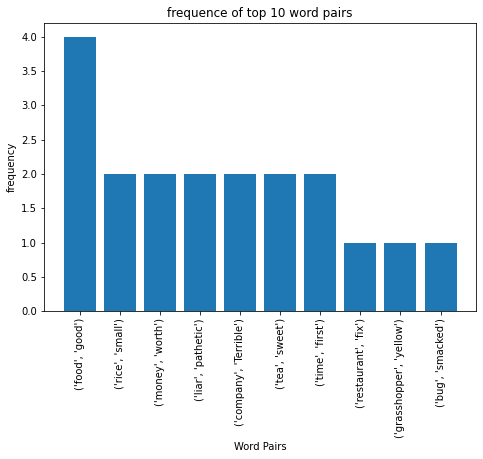

In [430]:
barplot_for_the_frequent_word_pairs(data_random_50_rating_1,10)

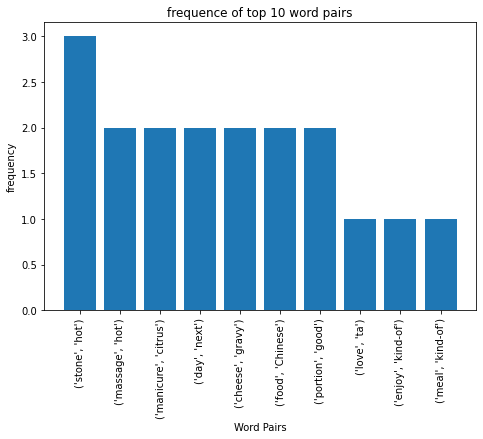

In [431]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_2,10)

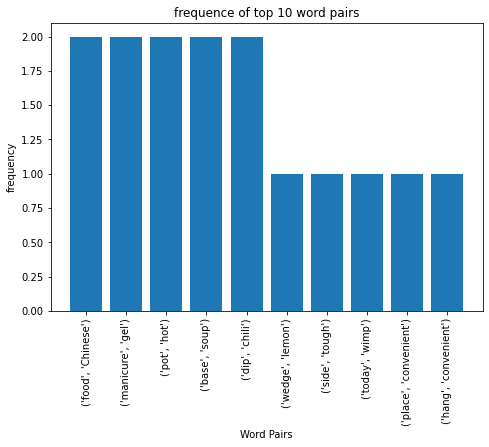

In [432]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_3,10)

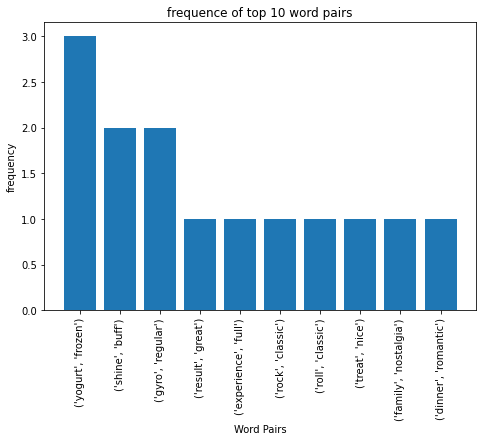

In [433]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_4,10)

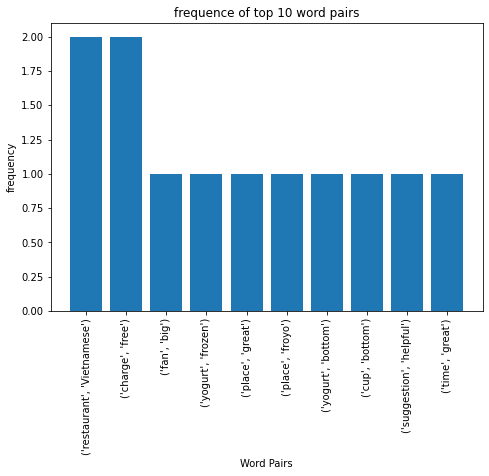

In [434]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_5,10)

### Wordclouds For Data Being Used For Each User Rating. 

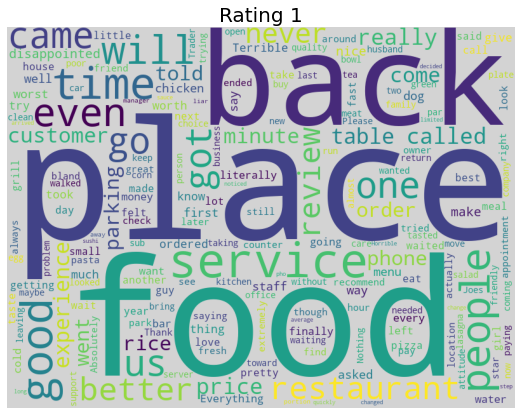

In [435]:
show_wordclouds(data_random_50_rating_1,"Rating 1")

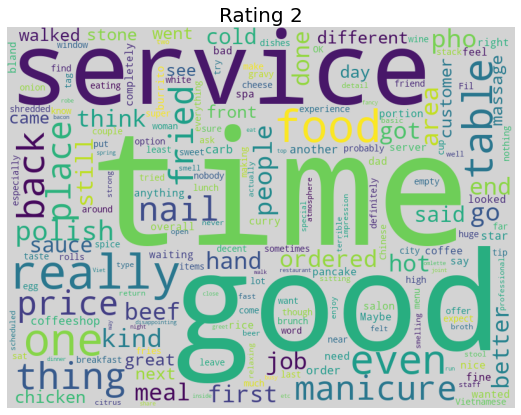

In [436]:
show_wordclouds(data_random_20_rating_2,"Rating 2")

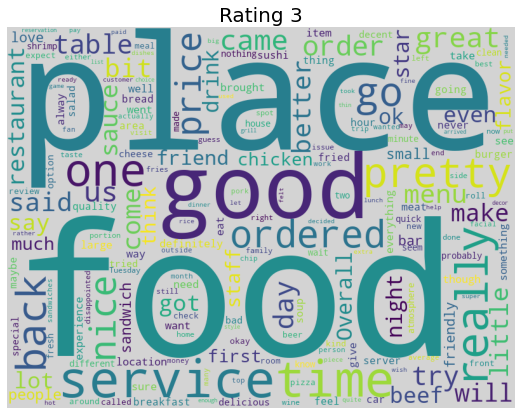

In [437]:
show_wordclouds(data_random_rating_3,"Rating 3")

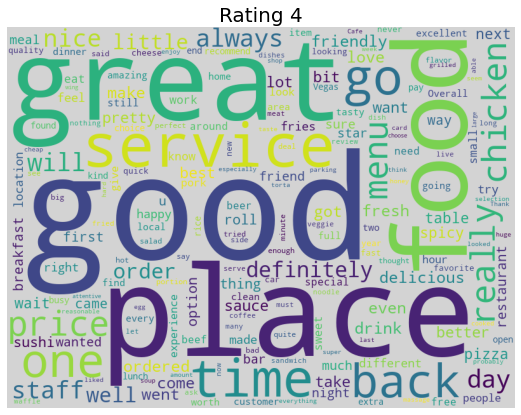

In [438]:
show_wordclouds(data_random_rating_4,"Rating 4")

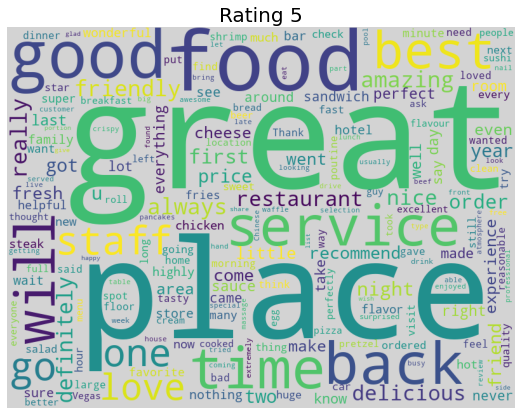

In [439]:
show_wordclouds(data_random_rating_5,"Rating 5")

### pos tags using regex trial

In [255]:
def pos_tag_sentence(sentence):
    pos_tagged_sentence = nltk_pos_tagging(sentence)
    sentence_pos_combined = ''
    for pos_tags in pos_tagged_sentence:
        sentence_pos_combined = sentence_pos_combined+" "+pos_tags[0]+" "+pos_tags[1]
    return sentence_pos_combined


In [256]:
pos_tag_sentence(data.iloc[9999]['text'])

" This DT place NN offers VBZ decent JJ food NN great JJ price NN . . Every DT Tuesday NNP `` `` Taco NNP Tuesday NNP '' '' - : $ $ 2.00 CD tacos NN . . The DT portions NNS good JJ staff NN friendly RB . . I PRP usually RB order NN tacos NNS corn NN tortillas NNS . . Their PRP$ salsa JJ bar NN fresh JJ clean NN . . The DT atmosphere JJ funky NN restaurant NN clean NN . . The DT manager NN told VBD offer NN catering VBG separate JJ menu NN . ."

In [259]:
text = 'he PRN and CC bill NP could MOD hear VB them PRN on IN the DT large JJ balcony NN near IN the DT house NN'
regex = re.compile(r'((\w+ JJ)* (\w+ (NN|NP|PRN)))')
m = regex.findall(pos_tag_sentence(data.iloc[9999]['text']))
if m :
    print (m)

[(' place NN', '', 'place NN', 'NN'), ('decent JJ food NN', 'decent JJ', 'food NN', 'NN'), ('great JJ price NN', 'great JJ', 'price NN', 'NN'), (' Tuesday NN', '', 'Tuesday NN', 'NN'), (' Taco NN', '', 'Taco NN', 'NN'), (' Tuesday NN', '', 'Tuesday NN', 'NN'), (' tacos NN', '', 'tacos NN', 'NN'), (' portions NN', '', 'portions NN', 'NN'), ('good JJ staff NN', 'good JJ', 'staff NN', 'NN'), (' order NN', '', 'order NN', 'NN'), (' tacos NN', '', 'tacos NN', 'NN'), (' corn NN', '', 'corn NN', 'NN'), (' tortillas NN', '', 'tortillas NN', 'NN'), ('salsa JJ bar NN', 'salsa JJ', 'bar NN', 'NN'), ('fresh JJ clean NN', 'fresh JJ', 'clean NN', 'NN'), ('atmosphere JJ funky NN', 'atmosphere JJ', 'funky NN', 'NN'), (' restaurant NN', '', 'restaurant NN', 'NN'), (' clean NN', '', 'clean NN', 'NN'), (' manager NN', '', 'manager NN', 'NN'), (' offer NN', '', 'offer NN', 'NN'), ('separate JJ menu NN', 'separate JJ', 'menu NN', 'NN')]


In [260]:
text = 'he PRN and CC bill NP could MOD hear VB them PRN on IN the DT large JJ balcony NN near IN the DT house NN'
regex = re.compile(r'((\w+ (NN|NP|PRN)))* (\w+ JJ)')
m = regex.findall(pos_tag_sentence(data.iloc[9999]['text']))
if m :
    print (m)

[('', '', '', 'decent JJ'), ('food NN', 'food NN', 'NN', 'great JJ'), ('', '', '', 'good JJ'), ('', '', '', 'salsa JJ'), ('bar NN', 'bar NN', 'NN', 'fresh JJ'), ('', '', '', 'atmosphere JJ'), ('', '', '', 'separate JJ')]


In [49]:
def find_adjective_phrases(pos_sentence):
    adjective_phrases=[]
    chunk_grammer="JJ-NN: {<JJ.*> <NN>}" 
    chunk_parser = nltk.RegexpParser(chunk_grammer)
    tree=chunk_parser.parse(pos_sentence)
    for subtree in tree.subtrees():
        if subtree.label()=="JJ-NN":
            adjective_phrases.append(subtree)
            
    return adjective_phrases

In [58]:
noun_adjective_pairs = []
for i in find_adjective_phrases(nltk_pos_tagging(data.iloc[9999]['text'])):
    noun_adjective_pairs.append([i[0],i[1]])

In [59]:
noun_adjective_pairs

[[('decent', 'JJ'), ('food', 'NN')],
 [('great', 'JJ'), ('price', 'NN')],
 [('good', 'JJ'), ('staff', 'NN')],
 [('salsa', 'JJ'), ('bar', 'NN')],
 [('fresh', 'JJ'), ('clean', 'NN')],
 [('atmosphere', 'JJ'), ('funky', 'NN')],
 [('separate', 'JJ'), ('menu', 'NN')]]

In [449]:
wordnet_lemmatizer("Desks")[0].lower()

'desks'